<a href="https://colab.research.google.com/github/pedrogfsilva/PonderadaSemana3/blob/main/Apresenta%C3%A7%C3%A3o_da_implementa%C3%A7%C3%A3o_do_modelo_LeNet_5_Pedro_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
"""
Contém as implementações de arquiteturas CNN.
[LeNet5] - CNN inspirada na arquitetura de LeCun&nbsp;[1], com algumas
alterações nas funções de ativação, padding e pooling.
[1] http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
"""
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

class LeNet5(object):
    """
    Arquitetura LeNet5 com pequenas alterações.
    Com foco no reconhecimento de dígitos, esta CNN é composta
    por uma sequência contendo os seguintes layers:
    INPUT =&gt; CONV =&gt; POOL =&gt; CONV =&gt; POOL =&gt; FC =&gt; FC =&gt; OUTPUT
    """

    @staticmethod
    def build(width, height, channels, classes):
        """
        Constroi uma CNN com arquitetura LeNet5.
        :param width: Largura em pixel da imagem.
        :param height: Altura em pixel da imagem.
        :param channels: Quantidade de canais da imagem.
        :param classes: Quantidade de classes para o output.
        :return: Cnn do tipo LeNet5.
        """
        inputShape = (height, width, channels)
        model = models.Sequential()
        model.add(layers.Conv2D(6, (5, 5), padding="same",
                         input_shape=inputShape))
        model.add(layers.Activation("relu"))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Conv2D(16, (5, 5)))
        model.add(layers.Activation("relu"))
        model.add(layers.MaxPooling2D((2,2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(120))
        model.add(layers.Activation("relu"))
        model.add(layers.Dense(84))
        model.add(layers.Activation("relu"))
        model.add(layers.Dense(classes))
        model.add(layers.Activation("softmax"))
        return model

In [19]:
"""
Treina uma CNN com o dataset MNIST.
A CNN é inspirada na arquitetura LeNet-5, com algumas
alterações nas funções de ativação, padding e pooling.
"""
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = fetch_openml('mnist_784')
data = np.array(dataset.data, dtype="float32") / 255.0
labels = dataset.target.astype("int")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
if backend.image_data_format() == "channels_last":
    data = data.reshape((data.shape[0], 28, 28, 1))
else:
    data = data.reshape((data.shape[0], 1, 28, 28))

In [21]:
# dividir o dataset entre train (75%) e test (25%)
(trainX, testX, trainY, testY) = train_test_split(data, labels)
# Transformar labels em vetores binarios
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

In [22]:
# inicializar e otimizar modelo
print("[INFO] inicializando e otimizando a CNN...")
model = LeNet5.build(28, 28, 1, 10)
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy",
              metrics=["accuracy"])

[INFO] inicializando e otimizando a CNN...


In [23]:
# Início da medição de tempo
start_time = time.time()

In [24]:
# treinar a CNN
print("[INFO] treinando a CNN...")
H = model.fit(trainX, trainY, batch_size=128, epochs=20, verbose=2,
          validation_data=(testX, testY))

[INFO] treinando a CNN...
Epoch 1/20
411/411 - 31s - loss: 1.3498 - accuracy: 0.6122 - val_loss: 0.5731 - val_accuracy: 0.8220 - 31s/epoch - 75ms/step
Epoch 2/20
411/411 - 28s - loss: 0.3171 - accuracy: 0.9057 - val_loss: 0.2569 - val_accuracy: 0.9239 - 28s/epoch - 68ms/step
Epoch 3/20
411/411 - 30s - loss: 0.2225 - accuracy: 0.9324 - val_loss: 0.2510 - val_accuracy: 0.9199 - 30s/epoch - 73ms/step
Epoch 4/20
411/411 - 30s - loss: 0.1798 - accuracy: 0.9454 - val_loss: 0.2346 - val_accuracy: 0.9283 - 30s/epoch - 73ms/step
Epoch 5/20
411/411 - 28s - loss: 0.1512 - accuracy: 0.9540 - val_loss: 0.1520 - val_accuracy: 0.9527 - 28s/epoch - 67ms/step
Epoch 6/20
411/411 - 28s - loss: 0.1342 - accuracy: 0.9595 - val_loss: 0.1564 - val_accuracy: 0.9519 - 28s/epoch - 67ms/step
Epoch 7/20
411/411 - 29s - loss: 0.1206 - accuracy: 0.9636 - val_loss: 0.1501 - val_accuracy: 0.9525 - 29s/epoch - 70ms/step
Epoch 8/20
411/411 - 29s - loss: 0.1103 - accuracy: 0.9663 - val_loss: 0.1311 - val_accuracy: 0.958

In [25]:
# Fim da medição de tempo
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

Tempo total de treinamento: 632.37 segundos


In [26]:
# Início da medição de tempo para inferência
start_time = time.time()

In [27]:
# avaliar a CNN
print("[INFO] avaliando a CNN...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
                            target_names=[str(label) for label in range(10)]))

[INFO] avaliando a CNN...
274/274 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1763
           1       0.98      0.99      0.99      2013
           2       0.97      0.98      0.98      1767
           3       0.99      0.95      0.97      1772
           4       0.95      0.99      0.97      1674
           5       0.99      0.96      0.98      1544
           6       0.98      0.99      0.98      1745
           7       0.98      0.98      0.98      1783
           8       0.94      0.97      0.96      1667
           9       0.98      0.95      0.96      1772

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [28]:
# Fim da medição de tempo para inferência
elapsed_time = time.time() - start_time
print(f"Tempo total de inferência: {elapsed_time:.2f} segundos")

Tempo total de inferência: 16.11 segundos


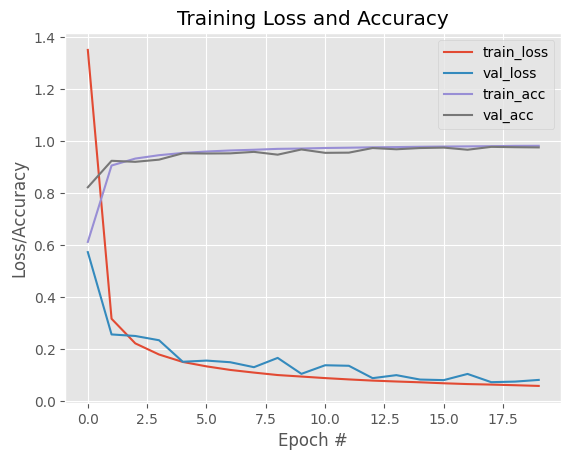

In [29]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()

num_epochs = len(H.history['loss'])

plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history.get("val_loss", []), label="val_loss")

plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history.get("val_accuracy", []), label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig('cnn.png', bbox_inches='tight')